<div class="alert alert-success">
<font size="5", color = "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Привет, Александр :) 
    
Спасибо за работу на проекте и добрые слова
        
осталось поправить функцию назначения категорий этажам, пример оставил
        
Подведем итоги, мы научились и повторили на проекте каким образом:

+ читать тех. задание проекта
+ исследовать неочищенные данные
+ выдвигать гипотезы о пропусках данных и заполнять их значениями
+ принимать решения об удалении некачественных данных
+ находить аномалии в данных и отделять редкие значения
+ соглашаться с наличием пропусков в данных и не забывать об их наличии при фильтрации
+ строить информативные визуализации
+ делить одну выборку на две части
+ находить зависимости и распределения в данных 
+ формировать выводы
        
Навыки отработаны замечательно, проект принят 

<b>Поздравляю с успешно сданным третьим проектом на факультете дата-аналитики Я.Практикум</b>

<div class="alert alert-success">
    <font size="5", color = "seagreen"><b>Успехов в дальнейшей учебе 🤝</b></font><br />
    
добавил бонус

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()
display(data.head(10)) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> display() вместо print(), поможет навести красоту на проекте

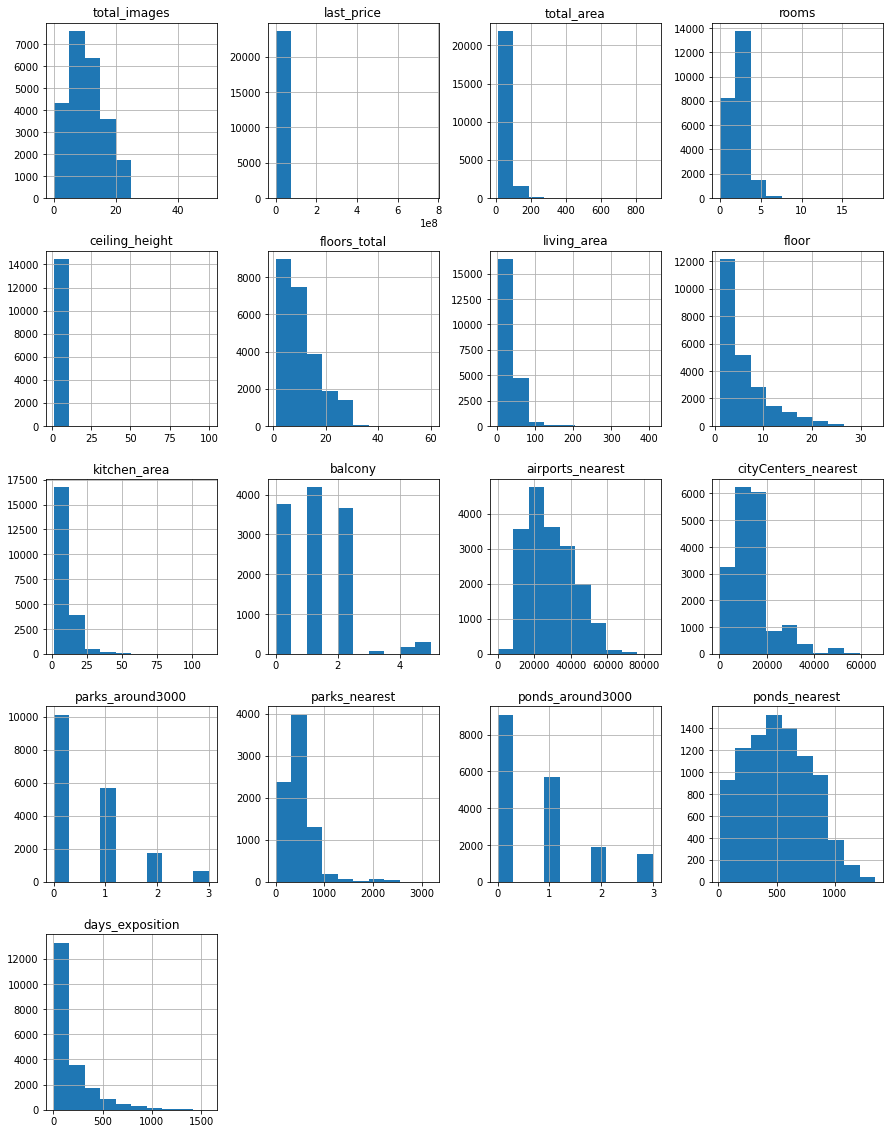

In [3]:
data.hist(figsize=(15, 20));

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> загрузка и обзор данных проведены корректно

In [4]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
        .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
    );    

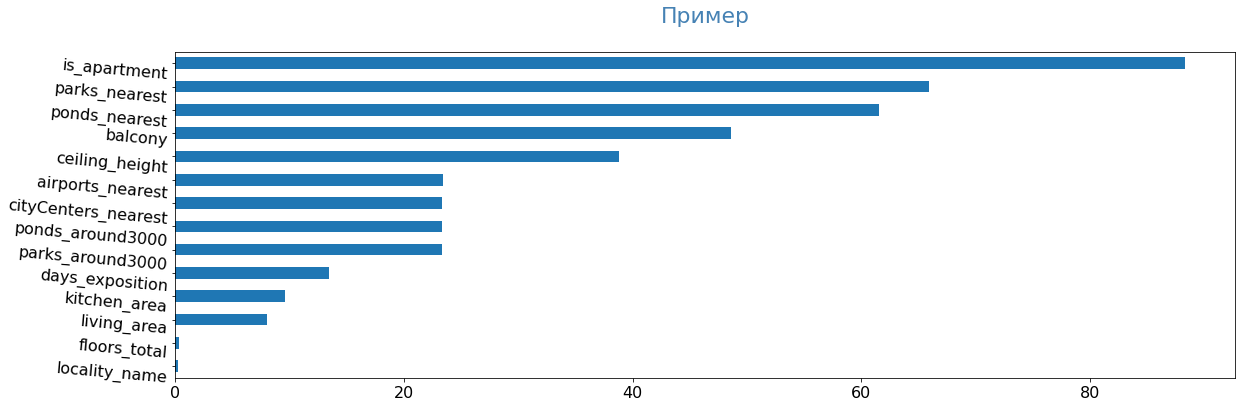

In [5]:
pass_value_barh(data)

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br /> Наглядность представления информации одна из важных составляющих работы дата-аналитика или дата-сайентиста
  

### Предобработка данных

In [6]:
data['floors_total'] = data['floors_total'].fillna(value=0)
data['floors_total'] = data['floors_total'].astype('int64')

In [7]:
data['balcony'] = data['balcony'].fillna(value=0.0)
data['parks_around3000'] = data['parks_around3000'].fillna(value=0.0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0.0) 
data['is_apartment'] = data['is_apartment'].astype('bool')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
#print(data.head(10))
#data.info()
#print(data['floors_total'].value_counts())
data.shape

(23699, 22)

Пропуски в столбцах balcony, parks_around3000, ponds_around3000 говорят о том, что в квартире, скорее всего, отсутствует балкон, а в радиусе 3-х километров нет парков и водоёмов. Пропуски в этих столбцах были заменены на 0.

In [8]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

<div class="alert alert-dang
            er">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
стоит сменить тип данных в 
        
         
         6   floors_total                     23613 non-null  float64       
         

In [9]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', '')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', '')
data['locality_name'] = data['locality_name'].str.replace('поселок', '')
data['locality_name'] = data['locality_name'].str.replace('деревня', '')
data['locality_name'] = data['locality_name'].str.replace('городской', '')
data['locality_name'] = data['locality_name'].str.replace('поселок', '')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество', '')
data['locality_name'] = data['locality_name'].str.replace('имени', '')
data['locality_name'] = data['locality_name'].str.replace('село', '')
data['locality_name'] = data['locality_name'].str.replace('станции', '')
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной', '')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', '')

data['locality_name'] = data['locality_name'].str.strip()

print(data['locality_name'].value_counts())

Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
                   ...  
Котлы                  1
Лесная Поляна          1
Снегиревка             1
Белоостров             1
Дружноселье            1
Name: locality_name, Length: 305, dtype: int64


In [10]:
# check
data['locality_name'].nunique()

305

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />хорошая работа по избавлению от неявных дубликатов

Из названий были удалены типы населённых пунктов, остались только названия. Как итог - количество уникальных наименований сократилось с 364 до 305

In [11]:
# check
data.shape

(23699, 22)

In [12]:
data['ceiling_height'] = data['ceiling_height'].replace(25, 2.5)
data['ceiling_height'] = data['ceiling_height'].replace(26, 2.6)
data['ceiling_height'] = data['ceiling_height'].replace(27, 2.7)
data['ceiling_height'] = data['ceiling_height'].replace(22.6, 2.26)
data['ceiling_height'] = data['ceiling_height'].replace(32, 3.2)
data['ceiling_height'] = data['ceiling_height'].replace(24, 2.4)
data['ceiling_height'] = data['ceiling_height'].replace(27.5, 2.75)

data = data.loc[(data['ceiling_height'] >= 2.5) & (data['ceiling_height'] <=5 ) | (data['ceiling_height'].isnull())]

In [13]:
# check
data.shape

(23609, 22)

На этом этапе были обработаны аномалии в значениях высоты потолков. Где природы аномалии была понятна - восстановлены правильные значения. В других случаях строки были удалены.

In [14]:
data = data.loc[data['total_area'] <= 400]
data = data.loc[(data['living_area'] <= 100) & (data['living_area'] >= 6) | (data['living_area'].isnull())]
data = data.loc[(data['days_exposition'] <= 500) | (data['days_exposition'].isnull())] 
data = data.loc[data['last_price'] <= 40000000]
data = data.loc[data['floor'] < 30]
data = data.loc[(data['kitchen_area'] >= 4) & (data['kitchen_area'] <= 60) | (data['kitchen_area'].isnull())]

data.shape

(21454, 22)

Жилая площадь в маленьких квартирах-студиях может быть определена не совсем корректно. Значения 2 м2 и 3 м2 кажутся аномальными. В России саниатрная норма на жилую площадь составляет 6 м2, поэтому квартиры, в которых жилая площадь меньше, не будут рассмотрены в дальнейшем анализе.

Также в анализе не используются квартиры, продающиеся слишком долго. Долгую продажу можно объяснить тем, что продавец не закрыл объявление - продал или передумал. 
В результате обработки пропусков и аномальных значений количество осталось 19670 объявлений, которые будут рассмотрены в дальнейшем анализе.

In [15]:
#print(data[data['last_price'] <= 100000])
data['last_price'] = data['last_price'].replace(12190, 12190000)
#print(data['last_price'].min())

В столбце 'last_price' выбивается значение 12190. Учитывая, что площадь данной квартиры больше 100 м2, и находится она в г. Санкт-Петербург, логично предположить, что цена указана в т.р. Значение было исправлено на 12190000.

In [16]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных показателях 
# в выбранных параметрах о продаже квартир


(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',
          'kitchen_area', 'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])  
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,454.00","21,454.00","12,995.00","18,401.00","21,454.00","19,670.00","19,334.00","21,454.00","21,454.00"
min,0.00,12.00,2.50,1.00,"430,000.00",6.00,4.00,1.00,0.00
max,9.00,400.00,5.00,500.00,"40,000,000.00",100.00,60.00,29.00,60.00


<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Ювелирная работа, молодец
        
осталось аномальное здание 60 этажей и квартиры более 200-т квадратов это редкости

In [17]:
# check
data.rooms.value_counts().to_frame()

,rooms
1,7505
2,7365
3,5237
4,954
0,185
5,174
6,24
7,9
9,1


### Посчитайте и добавьте в таблицу новые столбцы

In [18]:
data['price_for_meter'] = data['last_price'] / data['total_area']
data['day_publication'] = [x.weekday() for x in data['first_day_exposition']]
data['mounth_publication'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_publication'] = pd.DatetimeIndex(data['first_day_exposition']).year
#print(data.head(10))

In [19]:
def fltype(row):
    if row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] == 1:
        return 'первый'
    return 'другой'

data['floor_type'] = data.apply(fltype, axis=1)
data['floor_type'].value_counts()

другой       15869
последний     2970
первый        2615
Name: floor_type, dtype: int64

In [21]:
data['cityCenters_nearest_km'] = np.around(data['cityCenters_nearest'] / 1000, decimals=0)
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,day_publication,mounth_publication,year_publication,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.4,5,True,...,NaN,0.0,NaN,55.0,95065.789474,0,9,2018,другой,NaN
6,6,3700000.0,37.3,2017-11-02,1,NaN,26,10.6,6,True,...,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,другой,19.0


<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> display() вместо print(), поможет навести красоту на проекте

<div class="alert alert-dang
            er">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />стоит выполнить пункт проекта
        
•	расстояние до центра города в __километрах__ (переведите из м в км __и округлите до целых значений__).

### Проведите исследовательский анализ данных

Максимальная площадь: 400.0
Минимальная площадь: 12.0
Медианная площадь: 51.0
Средняя площадь: 56.782379975762105


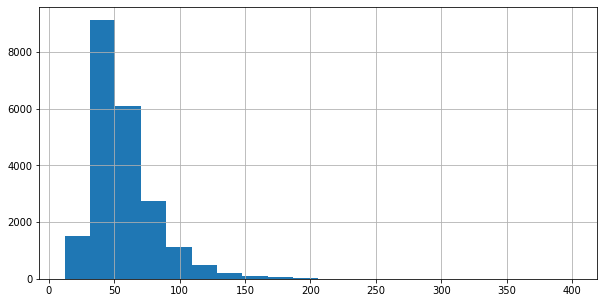

In [22]:
data['total_area'].hist(figsize=(10, 5), bins = 20)
print('Максимальная площадь:', data['total_area'].max())
print('Минимальная площадь:', data['total_area'].min())
print('Медианная площадь:', data['total_area'].median())
print('Средняя площадь:', data['total_area'].mean())

Подавляющее большинство квартир имеют площадь до 100 квадратных метров. Минимальная площадь составляет 12 м2, что, конечно, очень мало, но вполне вероятно. Медианное значение 51, а среднее почти 57 м2. Это обусловлено наличием квартир с огромной площадью - больше 200 м2, а максимальная площадь квартиры составляет 900 м2.

Максимальная жилая площадь: 100.0
Минимальная жилая площадь: 6.0
Медианная жилая площадь: 30.0
Средняя жилая площадь: 32.20688772282664


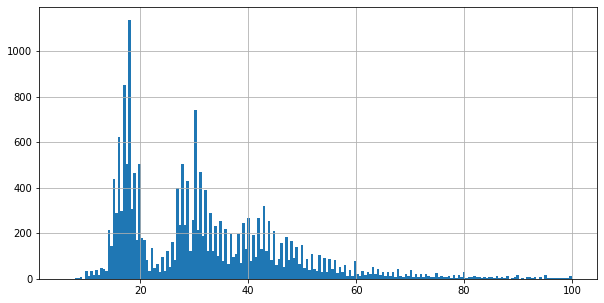

In [23]:
data['living_area'].hist(figsize=(10, 5), bins = 200)
print('Максимальная жилая площадь:', data['living_area'].max())
print('Минимальная жилая площадь:', data['living_area'].min())
print('Медианная жилая площадь:', data['living_area'].median())
print('Средняя жилая площадь:', data['living_area'].mean())

Максимальная площадь кухни: 60.0
Минимальная площадь кухни: 4.0
Медианная площадь кухни: 9.0
Средняя площадь кухни: 10.210208958311782


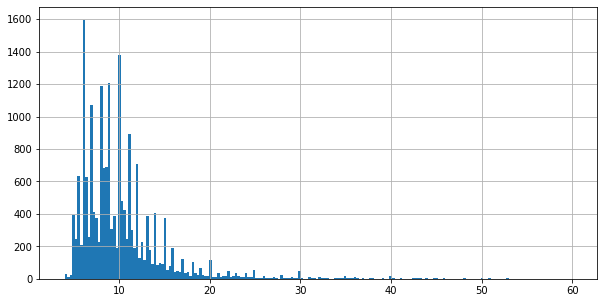

In [24]:
data['kitchen_area'].hist(figsize=(10, 5), bins = 200)
print('Максимальная площадь кухни:', data['kitchen_area'].max())
print('Минимальная площадь кухни:', data['kitchen_area'].min())
print('Медианная площадь кухни:', data['kitchen_area'].median())
print('Средняя площадь кухни:', data['kitchen_area'].mean())

Распределение жилой площади и площади кухни похожи на распределения общей площади, что логично. Подавляющее большинство квартир имеет жилую площадь до 50 м2 и площадь кухни до 15 м2.

count    2.145400e+04
mean     5.665055e+06
std      4.158194e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      4.000000e+07
Name: last_price, dtype: float64


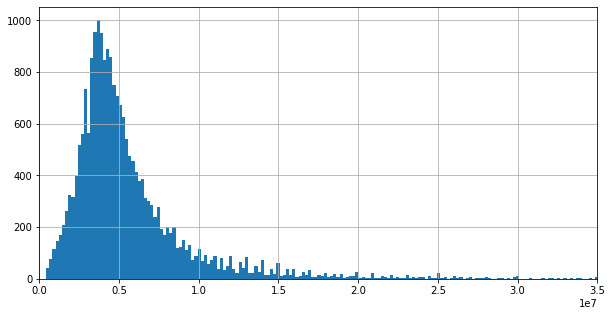

In [25]:
data['last_price'].hist(figsize=(10, 5), bins = 200)
plt.xlim(0, 35000000)
print(data['last_price'].describe())

Практически все квартиры стоят до 28 млн.руб. Средня стоимость квартиры составляет 5.66 млн.руб., а медианная стоимость равна 4.55 млн.руб.

count    21454.000000
mean         1.997203
std          0.953929
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: rooms, dtype: float64


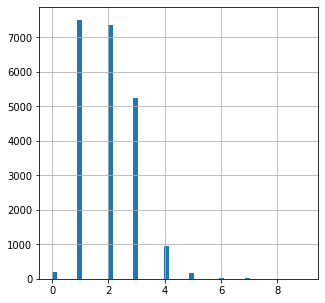

In [26]:
data['rooms'].hist(figsize=(5, 5), bins = 50)
print(data['rooms'].describe())

Саымыми популярными являются однокомнатные квартиры. Медианное и среднее значение количества комнат равно 2, что также указывает на их большую популярность.

count    12995.000000
mean         2.710416
std          0.251019
min          2.500000
25%          2.500000
50%          2.650000
75%          2.800000
max          5.000000
Name: ceiling_height, dtype: float64


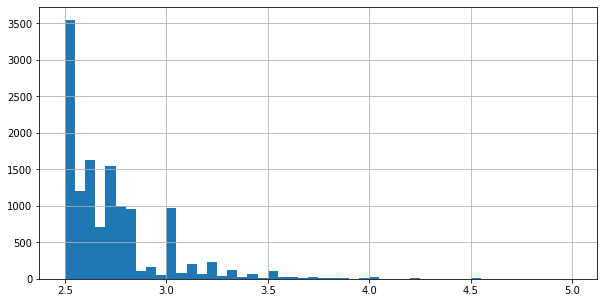

In [27]:
data['ceiling_height'].hist(figsize=(10, 5), bins = 50)
print(data['ceiling_height'].describe())

Больше всего квартир с высотой потолков до трёх метров. Также достаточно много квартир с высотой больше 3-х метров. Это может быть объяснено наличием в Санкт-Петербурге большого количества старых домов, которым свойствены высокие потолки.

count    21454.000000
mean         5.931155
std          4.903893
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         29.000000
Name: floor, dtype: float64


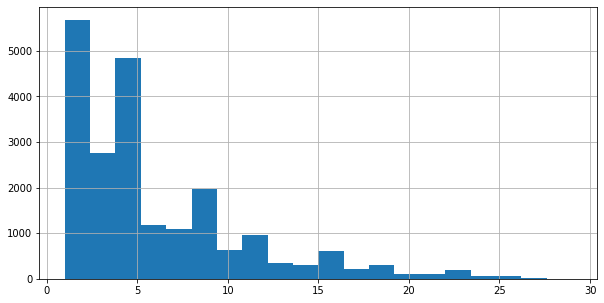

In [28]:
data['floor'].hist(figsize=(10, 5), bins = 20)
print(data['floor'].describe())

count      21454
unique         3
top       другой
freq       15869
Name: floor_type, dtype: object


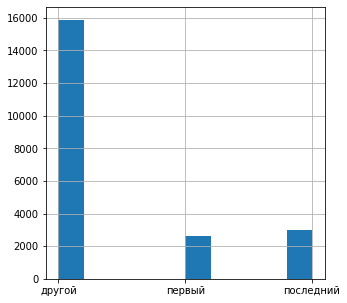

In [29]:
data['floor_type'].hist(figsize=(5, 5))
print(data['floor_type'].describe())

count    21454.000000
mean        10.746994
std          6.643132
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


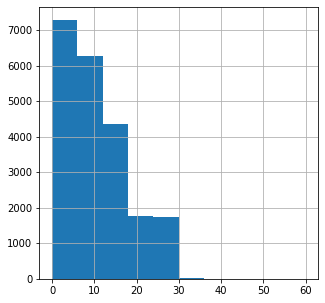

In [30]:
data['floors_total'].hist(figsize=(5, 5))
print(data['floors_total'].describe())

Логично, что "других" этажей больше, чем первых или последних. Также больше квартир продаётся с 1 по 4 этаж, что можно объяснить большим количеством домов, в которых нет этажей выше пятого.

count    16341.000000
mean     14498.551680
std       8483.457292
min        208.000000
25%       9858.000000
50%      13285.000000
75%      16446.000000
max      65952.000000
Name: cityCenters_nearest, dtype: float64

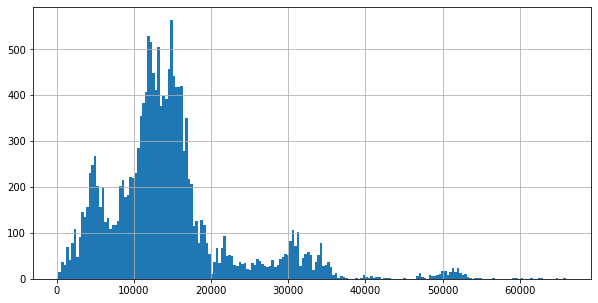

In [31]:
data['cityCenters_nearest'].hist(figsize=(10, 5), bins = 200)
data['cityCenters_nearest'].describe()

Больше всего квартир располагаются в радиусе 8000 - 20000 м от центра города. Медианное значение удаления от центра равно 13285 м, тогда как среднее - 14498 м. 

count    16322.000000
mean     28951.726749
std      12809.472404
min          0.000000
25%      18414.750000
50%      27098.500000
75%      37434.000000
max      84853.000000
Name: airports_nearest, dtype: float64


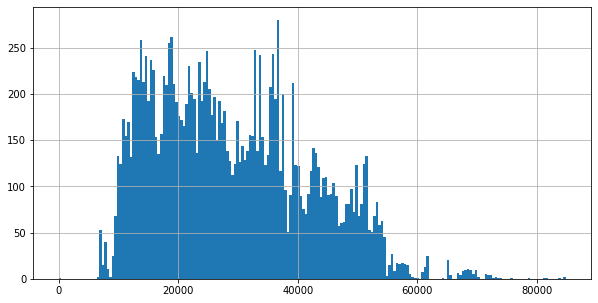

In [32]:
data['airports_nearest'].hist(figsize=(10, 5), bins = 200)
print(data['airports_nearest'].describe())

count    7095.000000
mean      492.141226
std       341.045126
min         1.000000
25%       288.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64


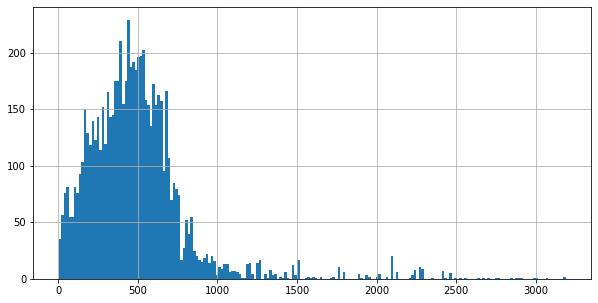

In [33]:
data['parks_nearest'].hist(figsize=(10, 5), bins = 200)
print(data['parks_nearest'].describe())

Больше квартир продаётся в районе 20000 м от ближайшего аэропорта и 400-600 м от ближайшего парка.
Общее количество квартир для подсчёта уменьшилось - это связано с пропусками в соответсвующих столбцах.

count    21454.000000
mean         2.576396
std          1.793652
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_publication, dtype: float64


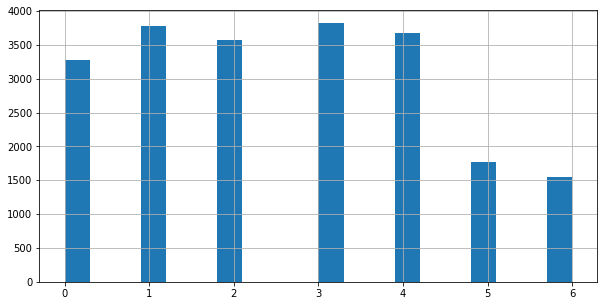

In [34]:
data['day_publication'].hist(figsize=(10, 5), bins = 20)
print(data['day_publication'].describe())

В будние дни объявления публикуются значительно чаще (примерно в 2 раза), чем в выходные. Часть объявлений публикуют риэлторы, что объясняет большее количество публикаций в будни.

count    21454.000000
mean         6.395824
std          3.490861
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: mounth_publication, dtype: float64


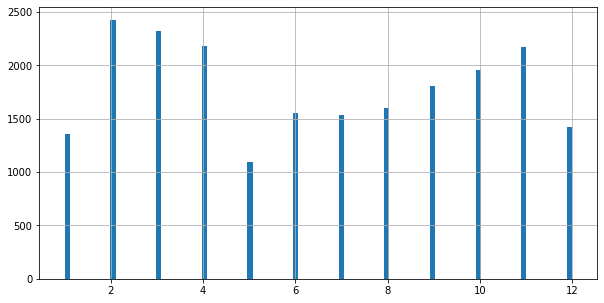

In [35]:
data['mounth_publication'].hist(figsize=(10, 5), bins = 100)
print(data['mounth_publication'].describe())

Объявления чаще публикуют в феврале, марте, апреле и ноябре. Реже всего - в январе, апреле и декабре.

count    18401.000000
mean       126.167165
std        118.656541
min          1.000000
25%         41.000000
50%         84.000000
75%        180.000000
max        500.000000
Name: days_exposition, dtype: float64


45.0     870
60.0     538
7.0      229
30.0     204
90.0     188
        ... 
499.0      4
474.0      3
373.0      3
2.0        3
1.0        1
Name: days_exposition, Length: 500, dtype: int64

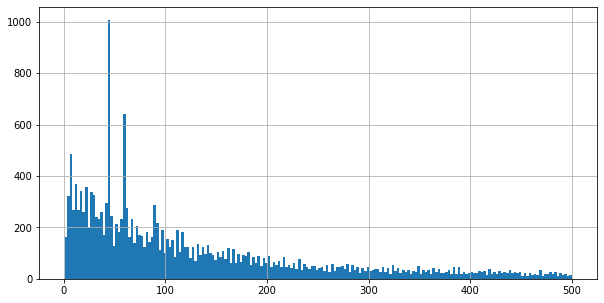

In [36]:
data['days_exposition'].hist(figsize=(10, 5), bins = 200)
print(data['days_exposition'].describe())
data['days_exposition'].value_counts()

В основной своей массе квартиры продаются в промежуток до 200 дней. Медианное значение - 84 днy, среднее - 126. 
Судя по гистограмме и третьему квартилю - дольше 250-300 дней можно считать необычайно долгим сроком продажи, а меньше 45 дней - очень быстрыми продажами.
На графике выделяются значения 7, 30, 45, 60 и 90 дней. Условия размещения таковы, что платное объявление висит 30 дней. Поэтому пики на кратные 30 числах объясняются заканчивающимся сроком платного размещения. Пики на 7 и 45 днях могут говорить о том, что ранее условия размещения были другие.

<div class="alert alert-dang
            er">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Стоит пересчитать статистики скорости продажи после восстановления пропусков

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />         
Не исследованы моды в 'days_exposition' и как они влияют на скорость продажи, подсказка на что смотреть
        
[Условия размещения объявлений](https://yandex.ru/support/realty/owner/home/add-ads-housing.html)

Для анализа факторов, влияющих на стоимость квартиры, было принято решение строить графики и считать только для Санкт-Петербурга, так как жильё в городе будет явно дороже, чем в деревне в Ленинградской области, вследствие чего считать завимость стоимости квартиры от количества комнат или жилой площади для всех населённых пунктов вместе будет некорректно.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />подход принимается

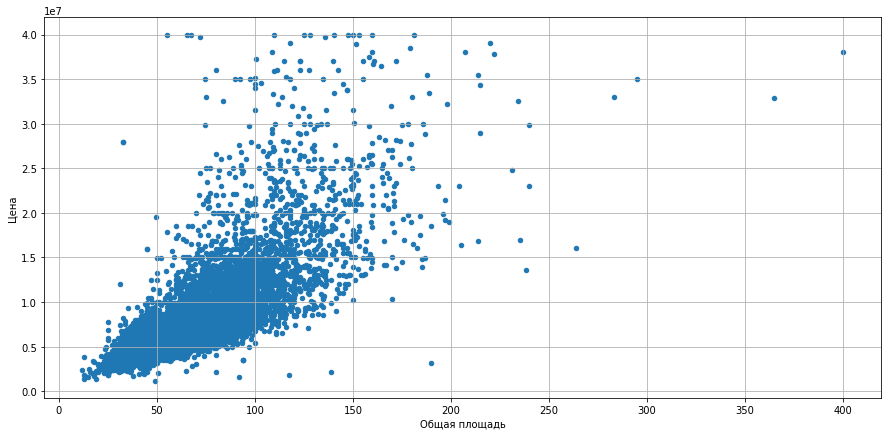

In [37]:
spb_flats = data.query('locality_name == "Санкт-Петербург"')

spb_flats.plot(kind='scatter', x='total_area', y='last_price', xlabel='Общая площадь', ylabel='Цена', grid=True, figsize=(15,7));

На графике видно большое скопление вариантов продажи квартир около 10 миллионов. Чем больше площадь квартиры, тем выше цена. Пики могут быть обусловлены другими факторами, например, расположением. 

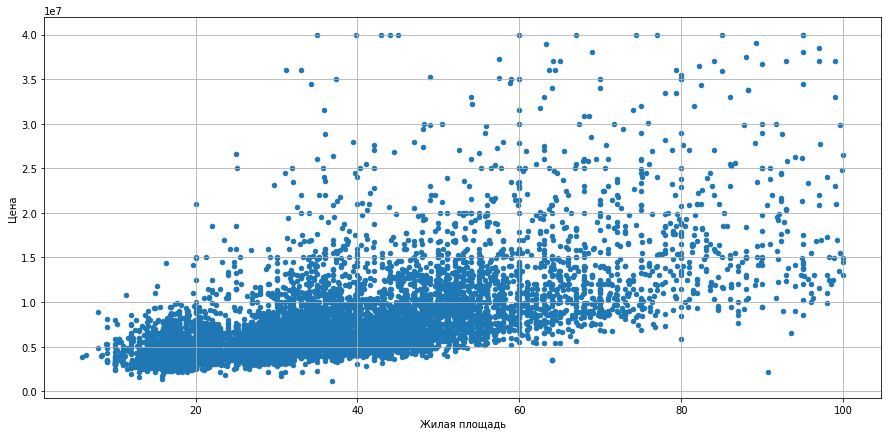

In [38]:
spb_flats.plot(
    kind='scatter', x='living_area', y='last_price', xlabel='Жилая площадь', ylabel='Цена', grid=True, figsize=(15,7)
);

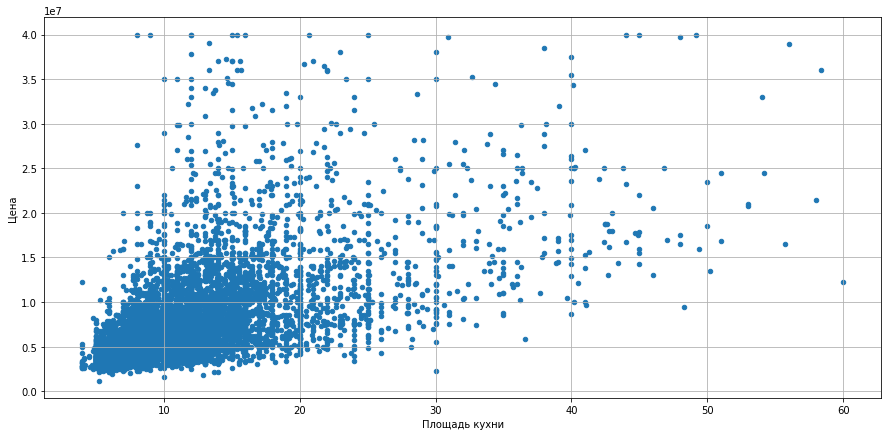

In [39]:
spb_flats.plot(
    kind='scatter', x='kitchen_area', y='last_price', xlabel='Площадь кухни', ylabel='Цена', grid=True, figsize=(15,7)
);

Наблюдаем ту же картину: стоимость растёт с увеличением жилой площади и площади кухни.

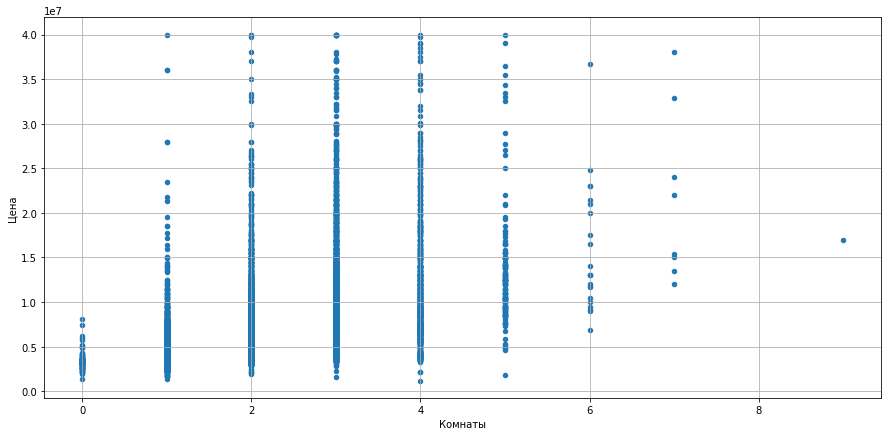

In [40]:
spb_flats.plot(
    kind='scatter', x='rooms', y='last_price', xlabel='Комнаты', ylabel='Цена', grid=True, figsize=(15,7)
);

Студии стоят меньше 10 млн, дорогих двух, трёх и четырёх комнатных больше, чем остальных. Начиная с 5-ти комнатных квартир наблюдаем, что практически нет объявлений дешевле 10 млн.руб.

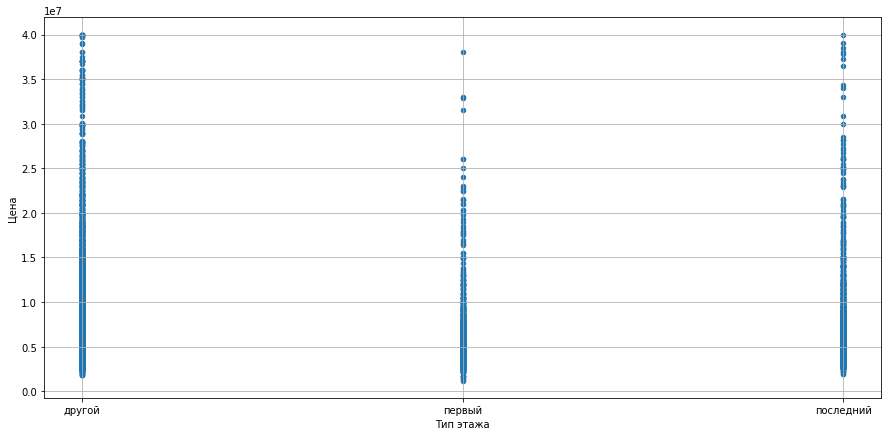

In [41]:
spb_flats.plot(
    kind='scatter', x='floor_type', y='last_price', xlabel='Тип этажа', ylabel='Цена', grid=True, figsize=(15,7)
);

Квартиры на первом этаже дешевле, на последнем - дороже. Низкая стоимость квартир на первом этаже обусловлена тем, что первый этаж кажется людям менее безопасным, большим, чем на других этажах, количеством влаги и сырости, отсутствием балкона. Из 6-ти квартир, стоимостью больше 200 млн.руб. 3 находятся на последнем этаже. В новых дорогих домах квартиры на последнем этаже иногда делают двухэтажными, с выходами на крышу в сад и т.д. Такие квартиры, как правило, намного дороже остальных. Этим можно объяснить, почему на графике квартиры на последнем этаже дороже остальных.

<AxesSubplot:ylabel='year_publication'>

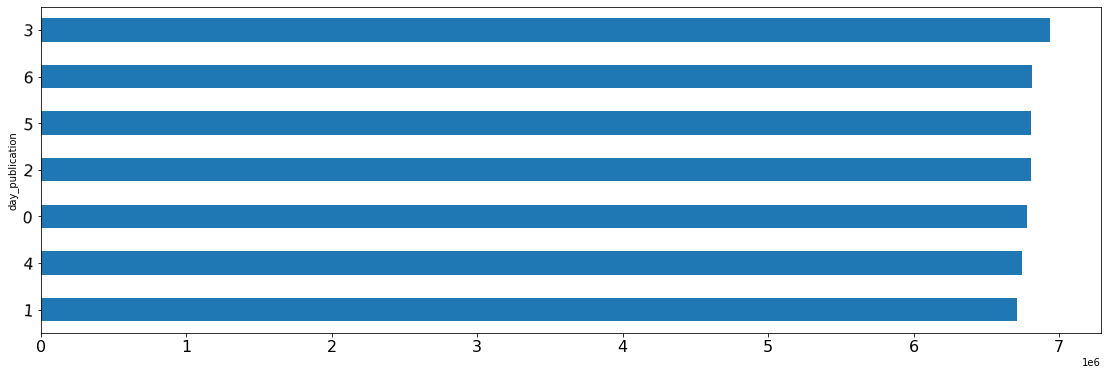

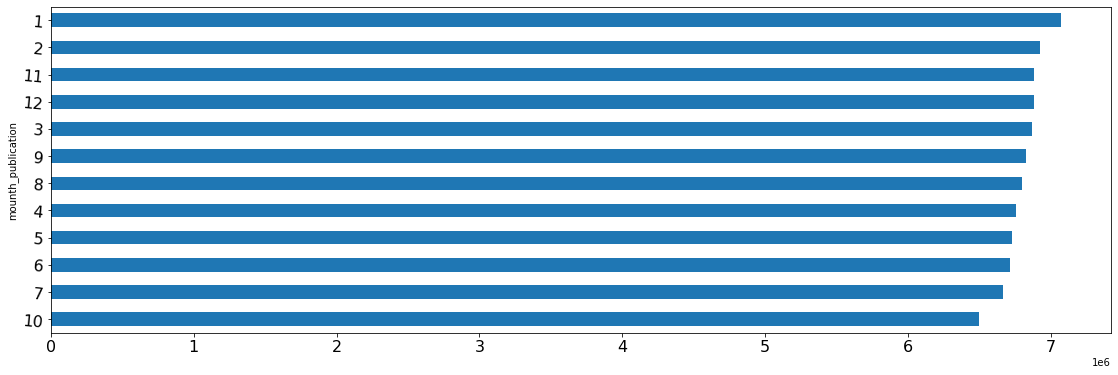

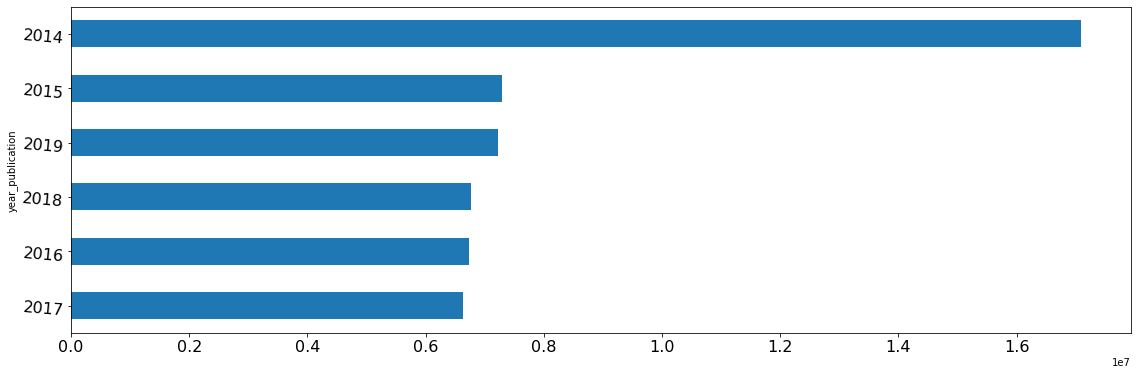

In [42]:
(spb_flats
 .pivot_table(index='day_publication', values='last_price')
 .sort_values(by='last_price', ascending=True)
 .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
)

(spb_flats
 .pivot_table(index='mounth_publication', values='last_price')
 .sort_values(by='last_price', ascending=True)
 .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
)

(spb_flats
 .pivot_table(index='year_publication', values='last_price')
 .sort_values(by='last_price', ascending=True)
 .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
)

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />принято, про маркетинг это предположение, а то, что объявлений было мало это факт :)

Самые дешёвые квартиры выставляются во вторник, а дорогие - в четверг. Учитывая, что разность в стоимости меньше миллиона, я бы сказал, что это погрешность, и взаимосвязи тут никакой нет.
На графике по месяцам видно заметный рост цен ближе к Новому году и вначале года. 
На графике зависимости года публикации от цены видно, что в 2014 году цены были значительно выше. В этом году сервис только начал работать - объявлений было мало, объявления могли быть маркетинговые.

In [43]:
data_most_ads = (
data.pivot_table(index = 'locality_name', values = ['price_for_meter'] , aggfunc ='count')
    .sort_values('price_for_meter',ascending = False)   
)
display(data_most_ads.head(10))

,price_for_meter
locality_name,
Санкт-Петербург,14073
Мурино,553
Кудрово,434
Шушары,416
Всеволожск,366
Пушкин,330
Колпино,321
Парголово,311
Гатчина,282


Топ-10 по количеству объявлений в населённых пунктах. Ожидаемо, больше всего объявлений в Санкт-Петербурге.

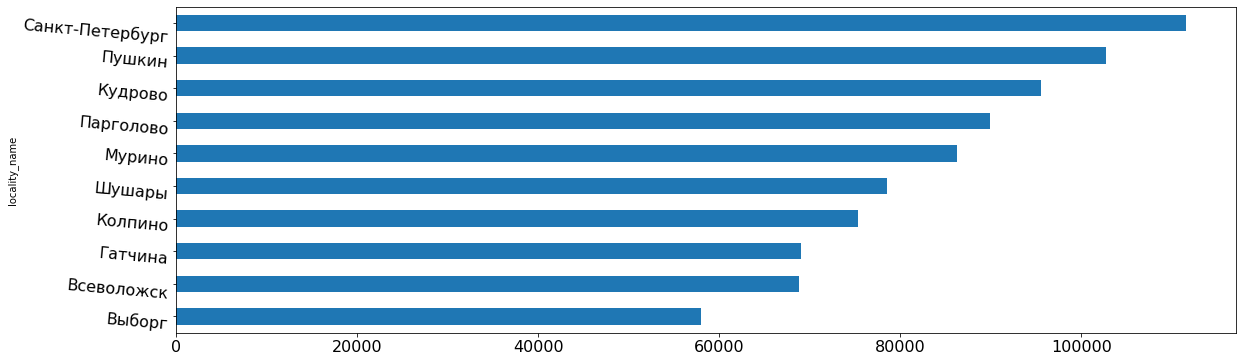

In [44]:
(data[data['locality_name']
      .isin(data_most_ads[:10].index)]
      .pivot_table(index = 'locality_name',values = 'price_for_meter', aggfunc ='mean')
      .sort_values('price_for_meter', ascending=True)
      .round(decimals=1)
      .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
);

Квадратный метр больше всего стоит в Санкт-Петербурге, меньше всего - в Выборге.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />за поворот текста отвечает параметр 
        
        rot

<div class="alert alert-dange
            r">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />  Осталось дополнить ТОП-10: сначала составляем список из десяти населенных пунктов в которых наибольшее кол-во объявлений, затем рассчитываем среднюю  стоимость кв. м. по населенным пунктам из полученного списка, затем строим график (бары), чтобы наглядно показать разницу в средней цене кв. метра ...
        
Шаг 4. Проведите исследовательский анализ данных:

4.	Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.
        
        


,last_price
cityCenters_nearest_km,
0.0,11277142.9
1.0,11870153.8
2.0,11394356.2
3.0,9364642.6
4.0,10352834.2
5.0,10923934.3
6.0,10023459.3
7.0,10305757.1
8.0,8667674.4


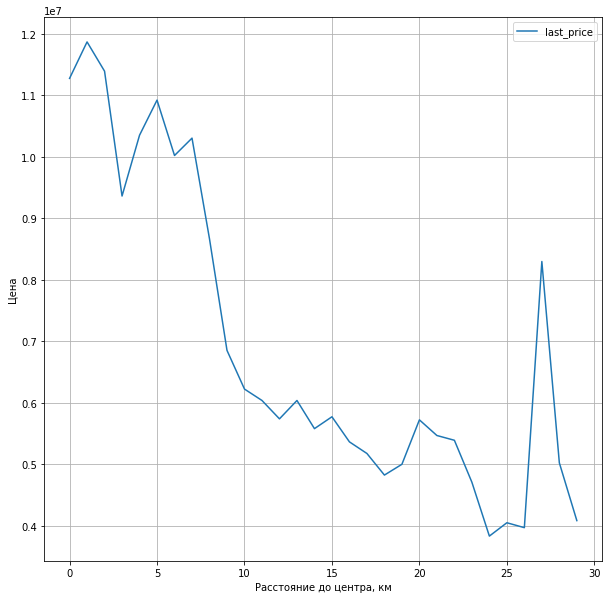

In [45]:
data_spb = ( 
    (data
     .query('locality_name == "Санкт-Петербург"')
     .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')
     .round(decimals=1)
    )
)    
display(data_spb)
data_spb.plot(grid=True, xlabel=('Расстояние до центра, км'), ylabel=('Цена'), figsize=(10, 10));

Стоимость квартир в Санкт-Петербурге уменьшается, отдаляясь от центра города. На графике виден небольшой скачок стоимости на 20 км от центра и большой скачок стоимости на 27 км. Такие скачки могут быть обусловлены нахождением на этом расстоянии элитных жк с дорогими квартирами.

### Общий вывод

В ходе исследовательского анализа было выявлено, что самые дорогие квартиры находятся в Санкт-Петербурге. Цена квартиры увеличивается с увеличением площади, а также на последнем этаже квартиры дороже, чем на первом. Самые высокие цены в объявлении - в конце года и в начале года. Также цена зависит от расположения: чем ближе к центру города, тем больше дорогих квартир. В среднем квартиры продаются около 100 дней; самые популярные - двухкомнатные, на втором месте - однокомнатные; средняя стоимость квартиры составляет 6,78 млн.руб.

<div class="alert alert-dan
            ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Итоговый вывод технически составлен грамотно
        
стоит пересмотреть результаты после возвращения части датасета и исправления всех комментариев

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />    
<p> Доп. материал: методы группировки и расчета суммы, средних и т.д.
        
[Подробное руководство по группировке и агрегированию с помощью pandas](https://dfedorov.spb.ru/pandas/%D0%9F%D0%BE%D0%B4%D1%80%D0%BE%D0%B1%D0%BD%D0%BE%D0%B5%20%D1%80%D1%83%D0%BA%D0%BE%D0%B2%D0%BE%D0%B4%D1%81%D1%82%D0%B2%D0%BE%20%D0%BF%D0%BE%20%D0%B3%D1%80%D1%83%D0%BF%D0%BF%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B5%20%D0%B8%20%D0%B0%D0%B3%D1%80%D0%B5%D0%B3%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8E%20%D1%81%20%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E%20pandas.html)
    
 Интересная функция в библиотеке пандаса
        
[Понимание функции transform в Pandas](https://dfedorov.spb.ru/pandas/%D0%9F%D0%BE%D0%BD%D0%B8%D0%BC%D0%B0%D0%BD%D0%B8%D0%B5%20%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8%20transform%20%D0%B2%20Pandas.html)

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />         
    
[Постер поможет выбирать вид графиков](https://www.notion.so/6c5ae8ceb8b5411e907c93c9b5e6a44e)

### Бонус

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера в2</b></font>
<br /> 
<font size="3", color = "black">
<br />Диаграмма рассеяния

In [46]:
# check
import seaborn as sns

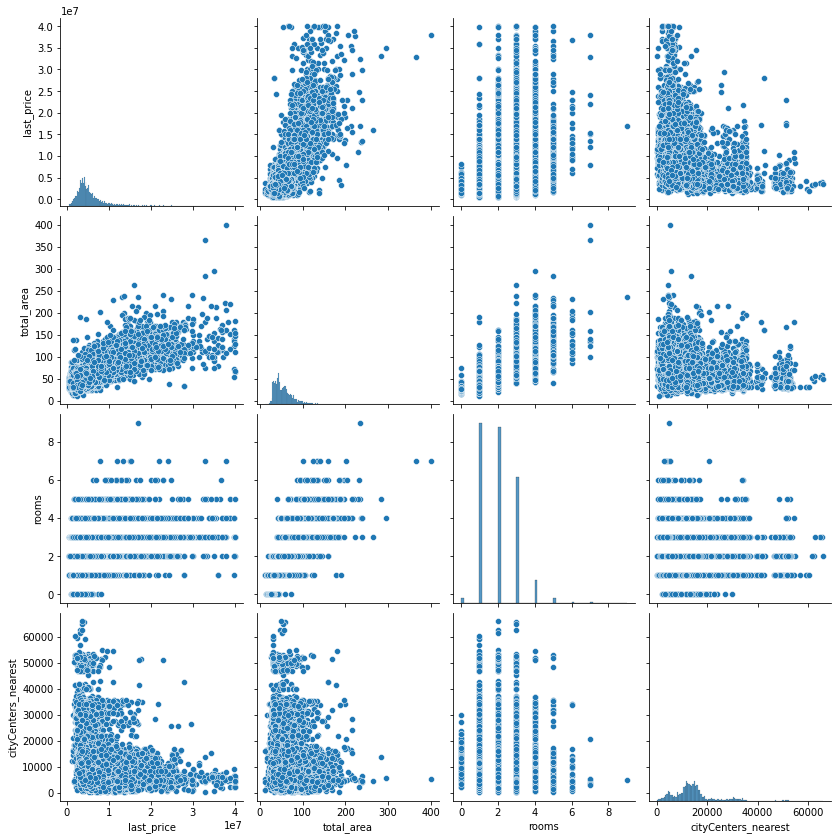

In [47]:
# check
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']])
plt.gcf().set_size_inches(12,12);


<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера в2</b></font>
<br /> 
<font size="3", color = "black">
<br />         
    
[5.2. Scatter - график разброса (точки)](https://pyprog.pro/mpl/mpl_scatter.html?ysclid=l65k3vmmqd649359421)

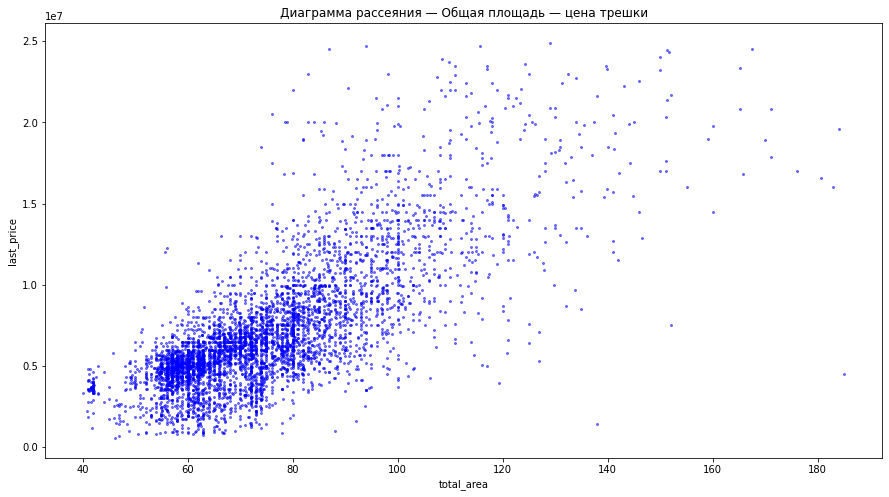

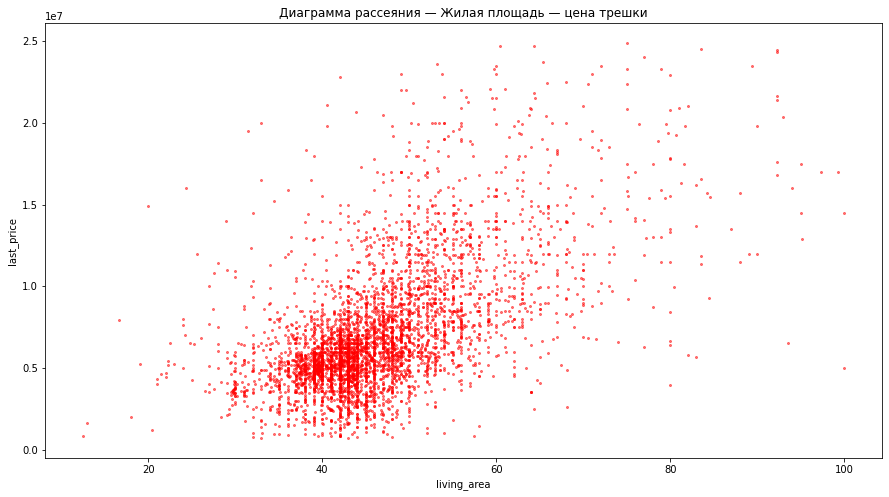

In [48]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения там, где это возможно
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  устранены неявные дубликаты в названиях населённых пунктов
- [ ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [ ]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [ ]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [ ]  посчитано и добавлено в таблицу: месяц публикации объявления
- [ ]  посчитано и добавлено в таблицу: год публикации объявления
- [ ]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [ ]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод